# Metoda nejmenších čtverců
*Tomáš Kalvoda, KAM FIT ČVUT, 2015, Notebook vytvořen pomocí Sage 6.6.rc2*

In [1]:
# pokud používáte tento notebook v SMC:
%load_ext sage

## Formulace problému

Nechť jsou dány diskrétní hodnoty $\{(x_i, y_i)\}_{i=1}^n \subset \mathbb{R}\times\mathbb{R}$. Cílem je vystihnout závislost $y$ na $x$. Uvažme konečnou množinu funkcí  $\{f_j\}_{j=1}^m$. Závislost hledáme ve tvaru lineární kombinace těchto funkcí, tedy
\begin{equation}
    y = f_c(x) = \sum_{j=1}^m c_j f_j(x).
\end{equation}

Kterou z těchto lineárních kombinací ale vybrat? Která je nejlepší? A co to vlastně znamená "být nejlepší"? Definujme funkci
\begin{equation}
    F(c) = \sum_{i=1}^n (f_c(x_i) - y_i)^2,
\end{equation}
která představuje **součet kvadrátů** odchylek $y_i$ od $f_c(x_i)$. Naším cílem je nalézt koeficienty $c_1,\ldots,c_m$ tak, aby hodnota $F(c)$ byla **nejmenší** možná. V tento okamžík by tedy mělo být jasné, proč mluvíme o **metodě nejmenších čtverců**.


Výše formulovanou úlohu lze snadno vyřešit s pomocí teorie funkcí více proměnných, jedná se totiž o standardní vícerozměrnou optimalizační úlohu. Aniž bychom zabíhali do detailů (což ani nemůžeme) konstatujme, že minimiální hodnota v tomto případě bude nabyta pro $c_1,\ldots,c_m$ splňující soustavu rovnic
\begin{equation}
    \partial_j F(c) = 2 \sum_{i=1}^n (f_c(x_i) - y_i) f_{j}(x_i) = 0, \quad j=1,2,\ldots m.
\end{equation}

Explicitně rozepsána tato sada podmínek říká
\begin{equation}
    \sum_{k=1}^m \left( \sum_{i=1}^n f_{k}(x_i) f_{j}(x_i)  \right)  c_k  = \sum_{i=1}^n f_{j}(x_i) y_i, \quad j=1,2,\ldots,m.
\end{equation}

Přepišme tyto rovnice do maticového tvaru. Označme
\begin{align}
    c &= (c_1,\ldots,c_m)^T \in \mathbb{R}^m, \\
    y &= (y_1,\ldots,y_n)^T \in \mathbb{R}^n, \\
    \mathbb{T}_{j,i} &= f_j(x_i), \quad \mathbb{T} \in \mathbb{R}^{m,n}.
\end{align}
Potom předchozí soustava má následující tvar
\begin{equation}
    \mathbb{T}\mathbb{T}^T c = \mathbb{T} y.
\end{equation}

Stačí tedy tuto soustavu vyřešit (nalézt hodnotu $c$). Toho lze docílit například Gaussovou eliminací. Invertovat matici v praxi není vhodné (pokud ovšem náhodou nepočítáme stalé stejný problém jen s jinými $y$).

In [2]:
class LeastSquares(SageObject):
    """
    Jednoduchá třída demonstrující práci s nejmenšími čtverci.
    """
    def __init__(self, funcs, data):
        """
        VSTUP:
        funcs: list funkcí z kterých konstruujeme fit
        data: data, list bodů
        
        ATRIBUTY:
        funcs, data: popsané výše
        coeffs: koeficienty lineární kombinace
        """
        self.funcs = funcs
        self.data = data
        mat = matrix([[f(d[0]) for d in data] for f in funcs])
        y = vector([d[1] for d in data])
        # self.cs = (mat*mat.transpose()).inverse()*mat*y
        self.coeffs = (mat*mat.transpose()).solve_right(mat*y)
    
    def __call__(self, x):
        """
        Vrátí hodnotu fitu v bodě x
        """
        return self.coeffs * vector([ f(x) for f in self.funcs])
        

## Příklad 1

Proložme několik náhodně zvolených bodů přímkou.

In [4]:
# testová data
testf = [lambda x: 1, lambda x: x]
testd = [ (0,1), (0.5,1), (1,2), (2,1), (2.5,1.5), (3,3)]

Inicializace našeho objektíku.

In [5]:
ls = LeastSquares(testf, testd)

Pro zajímavost zobrazíme hodnoty koeficientů lineární kombinace.

In [6]:
ls.coeffs

(0.940476190476190, 0.428571428571429)

Graf.

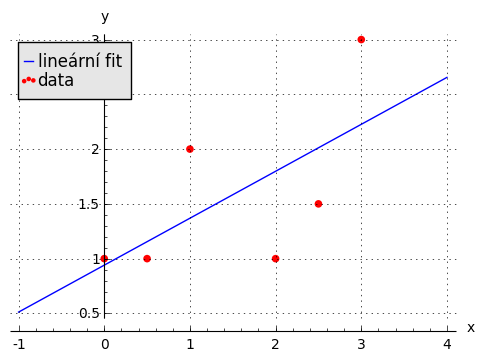

In [7]:
figfit = plot(ls,-1,4,axes_labels=['x','y'], gridlines=True, legend_label=u'lineární fit')
figdat = list_plot(testd, color='red', size=30, legend_label='data')
show(figfit+figdat, figsize=5)

## Příklad 2

Vytvořme pro ukázku sadu více bodů.

In [6]:
testf = [lambda x: 1, lambda x: x]
testd = [ (RR(x), log(RR(x)) + 2.*(random() - 0.5)) for x in range(1,100)]
ls = LeastSquares(testf, testd)

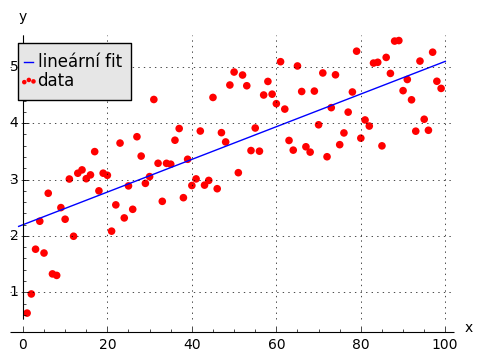

In [7]:
figfit = plot(ls,-1,100,axes_labels=['x','y'], gridlines=True, legend_label=u'lineární fit')
figdat = list_plot(testd, color='red', size=30, legend_label='data')
show(figfit+figdat, figsize=5)

Data jsme vytvořili tak, aby v nich byl patrný logaritmický růst. Na obrázku výše je vidět, že proložení přímkou není příliš hezké. Zkusme použít polynom vyššího stupně.

In [20]:
testf = [lambda x: 1, lambda x: x, lambda x: x^2, lambda x: x^3]
ls = LeastSquares(testf, testd)
ls.coeffs

(0.887285295973534, 0.129462187260842, -0.00192480161783700, 0.0000106203564627271)

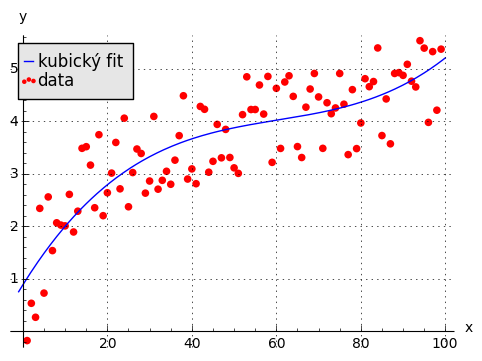

In [22]:
figfit = plot(ls,-1,100,axes_labels=['x','y'], gridlines=True, legend_label=u'kubický fit')
figdat = list_plot(testd, color='red', size=30, legend_label='data')
show(figfit+figdat, figsize=5)

"Ocásek" na pravé straně grafu se nám příliš nelíbí. *A priori* víme, že závislost má být logaritmické, proložme data logaritmickou funkcí.

In [8]:
testf = [lambda x: 1, log]
ls = LeastSquares(testf, testd)
ls.coeffs

(0.261662843947907, 0.933151709635215)

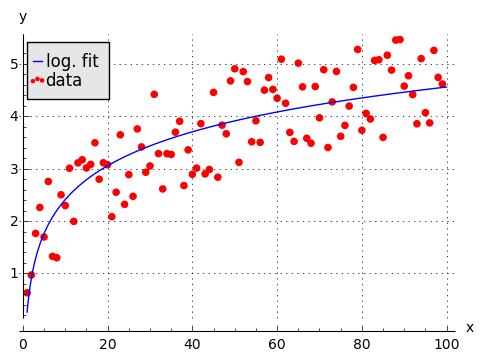

In [9]:
figfit = plot(ls,1,100,axes_labels=['x','y'], gridlines=True, legend_label=u'log. fit')
figdat = list_plot(testd, color='red', size=30, legend_label='data')
show(figfit+figdat, figsize=5)